In [24]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dfn= pd.read_csv('archer-normal-network.csv', sep=';')
dfm= pd.read_csv('archer-attack-mirai-network.csv', sep=';', error_bad_lines=False)

In [26]:
dfn = dfn.drop('Info', axis=1)
dfm = dfm.drop('Info', axis=1)

In [27]:
dfn = dfn.drop('No.', axis=1)

In [28]:
dfm = dfm.drop('No.', axis=1)

In [29]:
dfem = pd.read_csv('archer-attack-mirai.csv', sep=';')
dfen = pd.read_csv('archer-normal.csv', sep=';')

In [30]:
dfen = dfen.rename(columns={'time' : 'Energy_Time'})
dfem = dfem.rename(columns={'time' : 'Energy_Time'})

In [31]:
dfem = dfem.drop('timestamp', axis=1)
dfen = dfen.drop('timestamp', axis=1)

In [33]:
dfem.plot(x='time', y='Energy_Time',  figsize=(10, 5), grid=True)

KeyError: 'time'

In [ ]:
dfen.plot(x='Time', y='energy',  figsize=(10, 5), grid=True)

In [10]:
dfen.describe()

,energy,Energy_Time
count,1824.000000,1.824000e+03
mean,0.217188,8.978647e+05
std,0.020451,5.188100e+05
min,0.000000,0.000000e+00
25%,0.220000,4.489270e+05
50%,0.220000,8.978685e+05
75%,0.220000,1.346806e+06
max,0.270000,1.795739e+06


In [11]:
dfm = dfm[dfm.Protocol != 'ICMP']

In [12]:
dfn = dfn[dfn.Protocol != 'ICMP']

In [13]:
for col in dfn:
    print(dfn['Protocol'].unique())

['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP']


In [14]:
dfn.groupby('Protocol').count()

,Time,Source,Destination,Length
Protocol,,,,
ARP,182,182,182,182
DHCP,12,12,12,12
DNS,442,442,442,442
NTP,4,4,4,4
TCP,32,32,32,32
TLSv1.2,18,18,18,18


<AxesSubplot:>

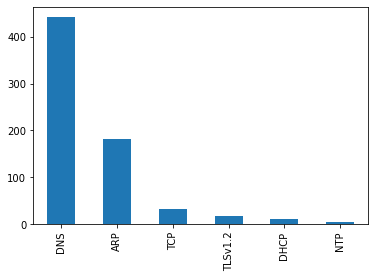

In [23]:
dfn['Protocol'].value_counts().plot.bar()

In [24]:
dfm['TCP_Protocol'] = np.where(dfm['Protocol'] == 'TCP', 1, 0)
dfm

,Time,Source,Destination,Protocol,Length,TCP_Protocol
0,0.000000,0.0.0.0,255.255.255.255,DHCP,412,0
1,1.003868,0.0.0.0,255.255.255.255,DHCP,424,0
2,1.006824,Tp-LinkT_81:9e:53,Broadcast,ARP,60,0
3,10.472554,Tp-LinkT_81:9e:53,Broadcast,ARP,60,0
4,10.472572,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0
...,...,...,...,...,...,...
994716,6828.198636,Tp-LinkT_81:9e:53,PcsCompu_73:1d:1d,ARP,60,0
994723,6831.813843,172.31.1.15,8.8.8.8,DNS,70,0
994724,6831.826825,8.8.8.8,172.31.1.15,DNS,134,0
994729,6834.152603,Tp-LinkT_81:9e:53,PcsCompu_73:1d:1d,ARP,60,0


In [25]:
dfn['TCP_Protocol'] = np.where(dfn['Protocol'] == 'TCP', 1, 0)
dfn

<ipython-input-25-4296d242e1c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfn['TCP_Protocol'] = np.where(dfn['Protocol'] == 'TCP', 1, 0)


,Time,Source,Destination,Protocol,Length,TCP_Protocol
0,0.000000,172.31.1.15,8.8.8.8,DNS,71,0
1,0.020682,8.8.8.8,172.31.1.15,DNS,135,0
2,5.002782,Tp-LinkT_81:9e:53,PcsCompu_73:1d:1d,ARP,60,0
3,5.002810,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0
4,5.053399,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0
...,...,...,...,...,...,...
686,1825.973756,8.8.8.8,172.31.1.15,DNS,118,0
687,1831.101386,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0
688,1831.101931,Tp-LinkT_81:9e:53,PcsCompu_73:1d:1d,ARP,60,0
689,1835.987291,172.31.1.15,8.8.8.8,DNS,70,0


In [26]:
dfen['target'] = 'Normal'
dfem['target'] = 'Mirai attack'

In [27]:
dfen

,energy,Energy_Time,Time,target
0,0.00,0,0.000000,Normal
1,0.00,981,0.020682,Normal
2,0.06,1965,5.002782,Normal
3,0.11,2948,5.002810,Normal
4,0.12,3935,5.053399,Normal
...,...,...,...,...
1819,0.22,1791790,NaN,Normal
1820,0.22,1792772,NaN,Normal
1821,0.22,1793775,NaN,Normal
1822,0.23,1794756,NaN,Normal


In [31]:
Normal_merge

,Time,Source,Destination,Protocol,Length,TCP_Protocol,energy,Energy_Time,target
0,0.000000,172.31.1.15,8.8.8.8,DNS,71,0,0.00,0,Normal
1,0.020682,8.8.8.8,172.31.1.15,DNS,135,0,0.00,981,Normal
2,5.002782,Tp-LinkT_81:9e:53,PcsCompu_73:1d:1d,ARP,60,0,0.06,1965,Normal
3,5.002810,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0,0.11,2948,Normal
4,5.053399,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0,0.12,3935,Normal
...,...,...,...,...,...,...,...,...,...
685,1825.973756,8.8.8.8,172.31.1.15,DNS,118,0,0.22,675733,Normal
686,1831.101386,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0,0.24,676720,Normal
687,1831.101931,Tp-LinkT_81:9e:53,PcsCompu_73:1d:1d,ARP,60,0,0.21,677704,Normal
688,1835.987291,172.31.1.15,8.8.8.8,DNS,70,0,0.22,678690,Normal


In [33]:
Normal_merge.corr()

,Time,Length,TCP_Protocol,energy,Energy_Time
Time,1.000000,-0.105368,-0.301310,0.351361,0.998993
Length,-0.105368,1.000000,-0.050975,-0.219274,-0.111258
TCP_Protocol,-0.301310,-0.050975,1.000000,-0.300174,-0.309707
energy,0.351361,-0.219274,-0.300174,1.000000,0.377964
Energy_Time,0.998993,-0.111258,-0.309707,0.377964,1.000000


In [34]:
# Finding categorical features
num_cols = Normal_merge._get_numeric_data().columns

cate_cols = list(set(Normal_merge.columns)-set(num_cols))
cate_cols


['Protocol', 'Source', 'Destination', 'target']

In [35]:
Final_merge = Normal_merge.append(Mirai_merge)
display(Final_merge)

,Time,Source,Destination,Protocol,Length,TCP_Protocol,energy,Energy_Time,target
0,0.000000,172.31.1.15,8.8.8.8,DNS,71,0,0.00,0,Normal
1,0.020682,8.8.8.8,172.31.1.15,DNS,135,0,0.00,981,Normal
2,5.002782,Tp-LinkT_81:9e:53,PcsCompu_73:1d:1d,ARP,60,0,0.06,1965,Normal
3,5.002810,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0,0.11,2948,Normal
4,5.053399,PcsCompu_73:1d:1d,Tp-LinkT_81:9e:53,ARP,42,0,0.12,3935,Normal
...,...,...,...,...,...,...,...,...,...
6784,367.997072,172.31.0.17,172.31.1.15,TCP,74,1,0.29,6923024,Mirai attack
6785,367.997078,172.31.0.17,172.31.1.15,TCP,74,1,0.28,6924004,Mirai attack
6786,367.997098,172.31.0.17,172.31.1.15,TCP,74,1,0.28,6924985,Mirai attack
6787,367.997104,172.31.0.17,172.31.1.15,TCP,74,1,0.28,6925965,Mirai attack


In [36]:
Final_merge.groupby('Protocol').count()

,Time,Source,Destination,Length,TCP_Protocol,energy,Energy_Time,target
Protocol,,,,,,,,
ARP,218,218,218,218,218,218,218,218
DHCP,16,16,16,16,16,16,16,16
DNS,526,526,526,526,526,526,526,526
ICMPv6,2,2,2,2,2,2,2,2
NTP,8,8,8,8,8,8,8,8
TCP,6661,6661,6661,6661,6661,6661,6661,6661
TLSv1.2,48,48,48,48,48,48,48,48


In [37]:
Final_merge = Final_merge[Final_merge.Protocol != 0]

In [38]:
for col in Final_merge:
    print(Final_merge['Protocol'].unique())

['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']
['DNS' 'ARP' 'DHCP' 'TCP' 'TLSv1.2' 'NTP' 'ICMPv6']


In [39]:
# protocol_type feature mapping
pmap = {'DNS':0, 'ARP':1, 'DHCP':2, 'ICMP':3, 'TCP':4, 'TLSv1.2':5, 'NTP':6, 'ICMPv6':7}
Final_merge['Protocol'] = Final_merge['Protocol'].map(pmap)

In [40]:
from sklearn import preprocessing


In [41]:
le = preprocessing.LabelEncoder()
Final_merge['Source'] = le.fit_transform(Final_merge.Source.values)
Final_merge['Destination'] = le.fit_transform(Final_merge.Destination.values)

In [42]:
Final_merge

,Time,Source,Destination,Protocol,Length,TCP_Protocol,energy,Energy_Time,target
0,0.000000,7,10,0,71,0,0.00,0,Normal
1,0.020682,11,5,0,135,0,0.00,981,Normal
2,5.002782,13,12,1,60,0,0.06,1965,Normal
3,5.002810,12,13,1,42,0,0.11,2948,Normal
4,5.053399,12,13,1,42,0,0.12,3935,Normal
...,...,...,...,...,...,...,...,...,...
6784,367.997072,5,5,4,74,1,0.29,6923024,Mirai attack
6785,367.997078,5,5,4,74,1,0.28,6924004,Mirai attack
6786,367.997098,5,5,4,74,1,0.28,6924985,Mirai attack
6787,367.997104,5,5,4,74,1,0.28,6925965,Mirai attack


In [43]:
Final_merge

,Time,Source,Destination,Protocol,Length,TCP_Protocol,energy,Energy_Time,target
0,0.000000,7,10,0,71,0,0.00,0,Normal
1,0.020682,11,5,0,135,0,0.00,981,Normal
2,5.002782,13,12,1,60,0,0.06,1965,Normal
3,5.002810,12,13,1,42,0,0.11,2948,Normal
4,5.053399,12,13,1,42,0,0.12,3935,Normal
...,...,...,...,...,...,...,...,...,...
6784,367.997072,5,5,4,74,1,0.29,6923024,Mirai attack
6785,367.997078,5,5,4,74,1,0.28,6924004,Mirai attack
6786,367.997098,5,5,4,74,1,0.28,6924985,Mirai attack
6787,367.997104,5,5,4,74,1,0.28,6925965,Mirai attack


In [23]:
Final_merge.to_csv('FinalSet.csv')

NameError: name 'Final_merge' is not defined

# The Model

In [45]:
import numpy as np
from collections import Counter

In [15]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

In [17]:
class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

In [18]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Model Accuracy is:",metrics.accuclass DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_commonracy_score(y_test, y_pred))

SyntaxError: invalid syntax (<ipython-input-18-b66c26aaf98d>, line 4)

In [19]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]

In [20]:
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

In [21]:
class RandomForest:
    
    def __init__(self, n_trees=10, min_samples_split=2,
                 max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [22]:
# Target variable and train set
y = Final_merge[['target']]
X = Final_merge.drop(['target', ], axis = 1)
  
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

NameError: name 'Final_merge' is not defined

In [ ]:
clf = RandomForest(n_trees = 5)
clf.fit(X_train, y_train)

In [51]:
clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')

d:\Users\riadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

In [52]:
print("=================== Confusion Matrix ======================")
print(confusion_matrix(y_test, y_pred))
print('\n') 
print("=================== Classification Report =================")
print(classification_report(y_test, y_pred))
print('\n') 
print("=================== All AUC Scores =======================")
print(clf_cv_score)
print('\n') 
print("=================== Mean AUC Score =======================")
print("Mean AUC Score - Random Forest: ", clf_cv_score.mean())

=================== Confusion Matrix ======================
[[2223    2]
 [   1  243]]


=================== Classification Report =================
              precision    recall  f1-score   support

Mirai attack       1.00      1.00      1.00      2225
      Normal       0.99      1.00      0.99       244

    accuracy                           1.00      2469
   macro avg       1.00      1.00      1.00      2469
weighted avg       1.00      1.00      1.00      2469



=================== All AUC Scores =======================
[0.94542272 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


=================== Mean AUC Score =======================
Mean AUC Score - Random Forest:  0.9945422723100894


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Mirai attack       1.00      1.00      1.00      2225
      Normal       0.99      1.00      0.99       244

    accuracy                           1.00      2469
   macro avg       1.00      1.00      1.00      2469
weighted avg       1.00      1.00      1.00      2469



In [54]:
estimator = clf.estimators_[5]

In [56]:
import time
from subprocess import check_output
import warnings


In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

In [59]:
print('Score list:', select_feature.scores_)
print('Feature list:', X_train.columns)

Score list: [3.33047393e+05 1.71518454e+03 9.84512490e+02 1.20829673e+03
 3.30170056e+03 4.10670859e+02 6.96724956e+00 1.29638140e+09]
Feature list: Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'TCP_Protocol',
       'energy', 'Energy_Time'],
      dtype='object')


In [60]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
d:\Users\riadh\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

Optimal number of features : 2
Best features : Index(['Time', 'energy'], dtype='object')


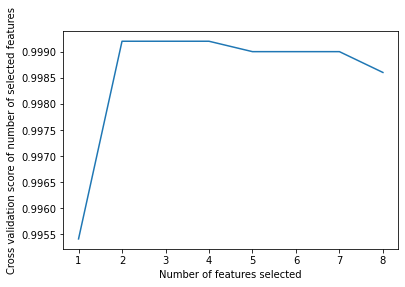

In [61]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<ipython-input-87-7a1d768caae2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf_5 = clf_rf_5.fit(X_train,y_train)


Feature ranking:
1. feature 6 (0.302515)
2. feature 0 (0.211578)
3. feature 5 (0.168457)
4. feature 1 (0.112348)
5. feature 3 (0.111781)
6. feature 7 (0.062927)
7. feature 2 (0.023541)
8. feature 4 (0.006854)


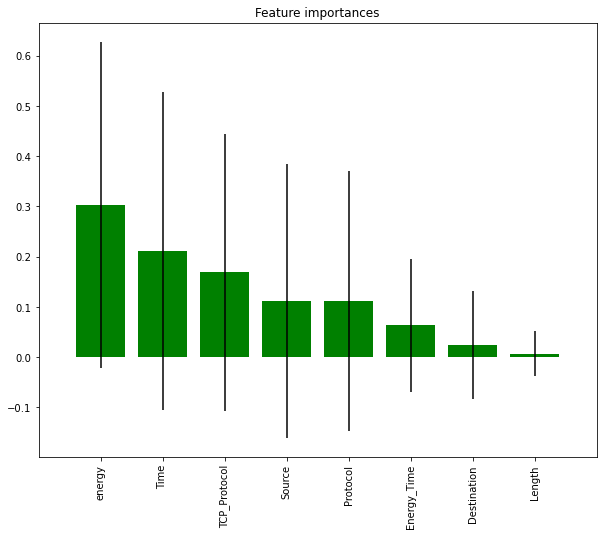

<Figure size 432x288 with 0 Axes>

In [87]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
plt.savefig('books_read.png')